This notebook provides a visualisation of the raw data for the monoisotope, and shows the curve that was fitted to find the RT apex.
It relies on the following files from BAM:
- scp -i ~/Documents/AWS\ keys/dwm-protlab.pem ubuntu@3.211.113.236:~/experiments/dwm-test/target-decoy-models/experiment-metrics-for-library-sequences.pkl ~/Downloads/experiments/dwm-test/target-decoy-models/

Note that sequences_metrics_df contains unclassified features - it may contain features classified as decoys from particular runs. In this notebook we rely on the 'analyse the isotope intensity adjustment by peptide' notebook to identify sequences of interest in particular runs.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
MAPPING_FILE_NAME = "/Users/darylwilding-mcbride/Downloads/experiments/dwm-test/recalibrated-percolator-output/percolator-idx-mapping.csv"

# determine the mapping between the percolator index and the run file name
def get_percolator_run_mapping(mapping_file_name):
    df = pd.read_csv(mapping_file_name)
    mapping_l = [tuple(r) for r in df.to_numpy()]
    return mapping_l

def file_idx_for_run(run_name):
    result = None
    mapping_l = get_percolator_run_mapping(MAPPING_FILE_NAME)
    for m in mapping_l:
        if m[1] == run_name:
            result = m[0]
            break
    return result

def run_name_for_file_idx(file_idx):
    result = None
    mapping_l = get_percolator_run_mapping(MAPPING_FILE_NAME)
    for m in mapping_l:
        if m[0] == file_idx:
            result = m[1]
            break
    return result

In [22]:
# produced by the notebook "classify all features extracted from all the runs"
SEQUENCES_WITH_SPECIES_FILE_NAME = '/Users/darylwilding-mcbride/Downloads/sequences-with-species-df.pkl'


In [23]:
classified_sequences_df = pd.read_pickle(SEQUENCES_WITH_SPECIES_FILE_NAME)

In [4]:
sequence_metrics_name = '/Users/darylwilding-mcbride/Downloads/experiments/dwm-test/target-decoy-models/experiment-metrics-for-library-sequences.pkl'

In [5]:
sequence_metrics_df = pd.read_pickle(sequence_metrics_name)

In [144]:
run_name = '190719_Hela_Ecoli_1to3_02'
file_idx = file_idx_for_run(run_name)
file_idx = 7

In [145]:
selected_sequence = 'NPNVTSVEHVVVLK'
selected_sequence_charge = 2

In [146]:
# which peak was selected?
classified_sequences_df[(classified_sequences_df.sequence == selected_sequence) & (classified_sequences_df.charge == selected_sequence_charge) & (classified_sequences_df.file_idx == file_idx)].iloc[0].peak_idx.astype(int)

0

In [147]:
df = sequence_metrics_df[(sequence_metrics_df.sequence == selected_sequence) & (sequence_metrics_df.charge == selected_sequence_charge) & (sequence_metrics_df.file_idx == file_idx)].copy()


In [148]:
df.columns

Index(['sequence', 'charge', 'theoretical_mz', 'experiment_scan_mean',
       'experiment_scan_std_dev', 'experiment_scan_peak_width',
       'experiment_rt_mean', 'experiment_rt_std_dev',
       'experiment_rt_peak_width', 'experiment_intensity_mean',
       'experiment_intensity_std_dev', 'number_of_runs_identified', 'q_value',
       'file_idx', 'target_coords', 'decoy_coords', 'peak_idx',
       'target_metrics', 'attributes', 'decoy_metrics', 'peak_count'],
      dtype='object')

In [149]:
len(df)

3

In [172]:
selected_peak_idx = 0
selected_peak_df = df[df.peak_idx == selected_peak_idx].iloc[0]
selected_peak_df

sequence                                                           NPNVTSVEHVVVLK
charge                                                                          2
theoretical_mz                                                            767.933
experiment_scan_mean                                                      442.372
experiment_scan_std_dev                                                   3.58217
experiment_scan_peak_width                                                41.7938
experiment_rt_mean                                                        593.407
experiment_rt_std_dev                                                     4.41185
experiment_rt_peak_width                                                  8.28725
experiment_intensity_mean                                             1.46667e+06
experiment_intensity_std_dev                                               682644
number_of_runs_identified                                                      20
q_value         

In [173]:
df.attributes

4353    {'intensity': 27562, 'inferred': 0, 'isotope_i...
4354    {'intensity': 402, 'inferred': 0, 'isotope_idx...
4355    {'intensity': 332, 'inferred': 0, 'isotope_idx...
Name: attributes, dtype: object

In [174]:
df

,sequence,charge,theoretical_mz,experiment_scan_mean,experiment_scan_std_dev,experiment_scan_peak_width,experiment_rt_mean,experiment_rt_std_dev,experiment_rt_peak_width,experiment_intensity_mean,...,number_of_runs_identified,q_value,file_idx,target_coords,decoy_coords,peak_idx,target_metrics,attributes,decoy_metrics,peak_count
4353,NPNVTSVEHVVVLK,2,767.933026,442.37225,3.582169,41.79375,593.407,4.411847,8.28725,1466666.75,...,20,0.000003,7,"{'mono_mz': 767.932873398165, 'scan_apex': 447...","{'mono_mz': 767.9973797595305, 'scan_apex': 35...",0.0,"{'delta_mz_ppm': 0.33518111890545976, 'delta_r...","{'intensity': 27562, 'inferred': 0, 'isotope_i...",NaN,3
4354,NPNVTSVEHVVVLK,2,767.933026,442.37225,3.582169,41.79375,593.407,4.411847,8.28725,1466666.75,...,20,0.000003,7,"{'mono_mz': 767.932873398165, 'scan_apex': 447...","{'mono_mz': 767.9973797595305, 'scan_apex': 35...",1.0,"{'delta_mz_ppm': 0.33518111890545976, 'delta_r...","{'intensity': 402, 'inferred': 0, 'isotope_idx...",NaN,3
4355,NPNVTSVEHVVVLK,2,767.933026,442.37225,3.582169,41.79375,593.407,4.411847,8.28725,1466666.75,...,20,0.000003,7,"{'mono_mz': 767.932873398165, 'scan_apex': 447...","{'mono_mz': 767.9973797595305, 'scan_apex': 35...",2.0,"{'delta_mz_ppm': 0.33518111890545976, 'delta_r...","{'intensity': 332, 'inferred': 0, 'isotope_idx...",NaN,3


In [175]:
mono_raw_points_df = pd.DataFrame(selected_peak_df.attributes['mono_raw_points_l'], columns=['retention_time_secs','intensity'])

In [176]:
mono_filtered_points_df = pd.DataFrame(selected_peak_df.attributes['mono_filtered_points_l'])
isotope_1_filtered_points_df = pd.DataFrame(selected_peak_df.attributes['isotope_1_filtered_points_l'])
isotope_2_filtered_points_df = pd.DataFrame(selected_peak_df.attributes['isotope_2_filtered_points_l'])

In [177]:
selected_peak_df.attributes.keys()

dict_keys(['intensity', 'inferred', 'isotope_idx_not_in_saturation', 'rt_apex', 'scan_apex', 'isotope_intensities_l', 'monoisotopic_mz_centroid', 'monoisotopic_mass', 'mono_raw_points_l', 'mono_filtered_points_l', 'isotope_1_filtered_points_l', 'isotope_2_filtered_points_l', 'mono_rt_bounds', 'isotope_1_rt_bounds', 'isotope_2_rt_bounds'])

In [178]:
mono_rt_lower,mono_rt_upper = selected_peak_df.attributes['mono_rt_bounds']
mono_isolated_peak_df = mono_filtered_points_df[(mono_filtered_points_df.x >= mono_rt_lower) & (mono_filtered_points_df.x <= mono_rt_upper)]
mono_rt_apex_derived = selected_peak_df.attributes['rt_apex']
mono_rt_apex_estimated = selected_peak_df.target_coords['rt_apex']

In [179]:
isotope_1_rt_lower,isotope_1_rt_upper = selected_peak_df.attributes['isotope_1_rt_bounds']
isotope_1_isolated_peak_df = isotope_1_filtered_points_df[(isotope_1_filtered_points_df.x >= isotope_1_rt_lower) & (isotope_1_filtered_points_df.x <= isotope_1_rt_upper)]

In [180]:
isotope_2_rt_lower,isotope_2_rt_upper = selected_peak_df.attributes['isotope_2_rt_bounds']
isotope_2_isolated_peak_df = isotope_2_filtered_points_df[(isotope_2_filtered_points_df.x >= isotope_2_rt_lower) & (isotope_2_filtered_points_df.x <= isotope_2_rt_upper)]

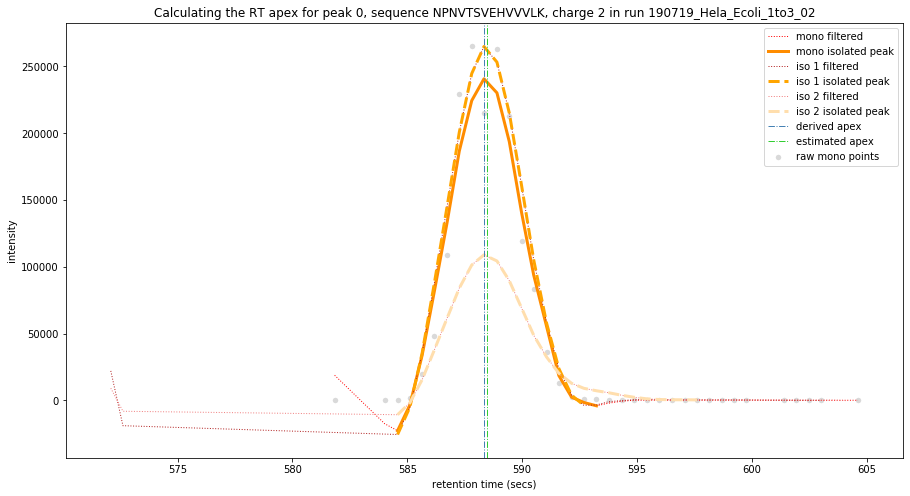

In [181]:
f, ax = plt.subplots()
f.set_figheight(8)
f.set_figwidth(15)
plt.margins(0.06)

title = 'Calculating the RT apex for peak {}, sequence {}, charge {} in run {}'.format(selected_peak_idx, selected_sequence, selected_sequence_charge, run_name)
plt.title(title)

ax.scatter(mono_raw_points_df.retention_time_secs, mono_raw_points_df.intensity, marker='o', color='silver', lw=0, s=30, alpha=0.6, label='raw mono points')

# isotope 0
ax.plot(mono_filtered_points_df.x, mono_filtered_points_df.filtered_intensity, marker='', color='red', linestyle=':', linewidth=1, ms=5, label='mono filtered')
ax.plot(mono_isolated_peak_df.x, mono_isolated_peak_df.filtered_intensity, marker='', color='darkorange', linestyle='-', linewidth=3, ms=5, label='mono isolated peak')

# isotope 1
ax.plot(isotope_1_filtered_points_df.x, isotope_1_filtered_points_df.filtered_intensity, marker='', color='firebrick', linestyle=':', linewidth=1, ms=5, label='iso 1 filtered')
ax.plot(isotope_1_isolated_peak_df.x, isotope_1_isolated_peak_df.filtered_intensity, marker='', color='orange', linestyle='--', linewidth=3, ms=5, label='iso 1 isolated peak')

# isotope 2
ax.plot(isotope_2_filtered_points_df.x, isotope_2_filtered_points_df.filtered_intensity, marker='', color='lightcoral', linestyle=':', linewidth=1, ms=5, label='iso 2 filtered')
ax.plot(isotope_2_isolated_peak_df.x, isotope_2_isolated_peak_df.filtered_intensity, marker='', color='navajowhite', linestyle='--', linewidth=3, ms=5, label='iso 2 isolated peak')

ax.axvline(mono_rt_apex_derived, color='steelblue', lw=1.0, ls='-.', label='derived apex')
ax.axvline(mono_rt_apex_estimated, color='limegreen', lw=1.0, ls='-.', label='estimated apex')

plt.legend(loc='best')
plt.xlabel('retention time (secs)')
plt.ylabel('intensity')

plt.show()

#### looking at metrics for each peak

In [182]:
for idx in range(len(df)):
    print(df[df.peak_idx == idx].iloc[0].target_metrics['rt_isotope_correlation'])


0.08835173286605492
0.12913386396090287
0.05763285214654639
